# Pymaceuticals Inc.
___

### Analysis



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#print(f"Mouse file columns are: {mouse_metadata.columns}")
#print(f"Study results columns are: {study_results.columns}")
#print(mouse_metadata["Mouse ID"].value_counts())
#print(study_results["Mouse ID"].value_counts())


# Combine the data into a single DataFrame
main_data_df = pd.merge(mouse_metadata, study_results, how = 'inner', on = "Mouse ID")

# Display the data table for preview
main_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
main_data_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(main_data_df[["Mouse ID", "Timepoint"]].value_counts())

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Name: count, Length: 1888, dtype: int64


In [4]:
#duplicate = main_data_df[["Mouse ID", "Timepoint"]].value_counts() > 1
#duplicate.head()

In [5]:
duplicate_rows = main_data_df[main_data_df.duplicated(["Mouse ID", "Timepoint"], keep = False)]

In [6]:
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
wrong_data = main_data_df[main_data_df["Mouse ID"] == "g989"]
print(wrong_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = main_data_df[main_data_df["Mouse ID"] != "g989"]

In [9]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [12]:
drug_regimen_group = cleaned_df.groupby(["Drug Regimen"])

mean_tumor = drug_regimen_group["Tumor Volume (mm3)"].mean()
mean_tumor

median_tumor = drug_regimen_group["Tumor Volume (mm3)"].median()
median_tumor

var_tumor = drug_regimen_group["Tumor Volume (mm3)"].var()
var_tumor

stdev_tumor = drug_regimen_group["Tumor Volume (mm3)"].std()
stdev_tumor

sem_tumor = drug_regimen_group["Tumor Volume (mm3)"].sem()
sem_tumor

tumor_summary_dataframe = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                                        "Median Tumor Volume": median_tumor,
                                        "Tumor Volume Variance": var_tumor,
                                        "Tumor Volume Std. Dev.": stdev_tumor,
                                        "Tumor Volume Std. Err.": sem_tumor})
tumor_summary_dataframe


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [117]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

aggregate = drug_regimen_group["Tumor Volume (mm3)"].aggregate([np.mean, np.median, np.var, np.std, sem])
aggregate

/var/folders/tn/7xgwzpvd48l_vrzdsn4gsdxm0000gn/T/ipykernel_3567/2983325764.py:6: FutureWarning: The provided callable <function mean at 0x105d09440> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregate = drug_regimen_group["Tumor Volume (mm3)"].aggregate([np.mean, np.median, np.var, np.std, sem])
/var/folders/tn/7xgwzpvd48l_vrzdsn4gsdxm0000gn/T/ipykernel_3567/2983325764.py:6: FutureWarning: The provided callable <function median at 0x105e454e0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  aggregate = drug_regimen_group["Tumor Volume (mm3)"].aggregate([np.mean, np.median, np.var, np.std, sem])
/var/folders/tn/7xgwzpvd48l_vrzdsn4gsdxm0000gn/T/ipykernel_3567/2983325764.py:6: FutureWarning: The provided callable <function var at 0

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

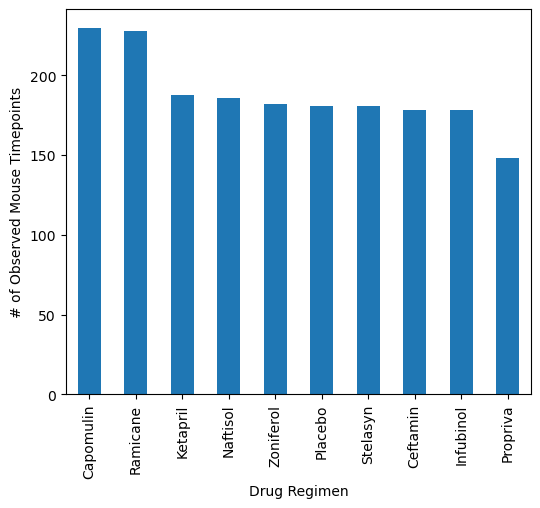

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_timepoint=cleaned_df.groupby(["Drug Regimen"]).count()["Timepoint"]
bar_df = pd.DataFrame(drug_timepoint)
bar_df = bar_df.sort_values("Timepoint", ascending = False)


bar_plot_pd = bar_df.plot(kind = "bar", legend = False, figsize = (6,5))
bar_plot_pd.set_xlabel("Drug Regimen")
bar_plot_pd.set_ylabel("# of Observed Mouse Timepoints")
#plt.savefig('bar_plot_pd.png')
plt.show()
#plt.tight_layout()

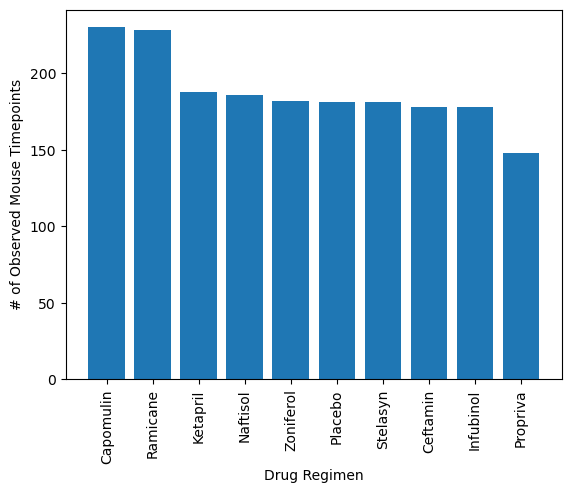

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_df
x_axis = np.arange(len(bar_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, bar_df["Drug Regimen"], rotation = 90)
y_axis = bar_df['Timepoint']

bar_plot_mat = plt.bar(x_axis, y_axis, align = 'center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


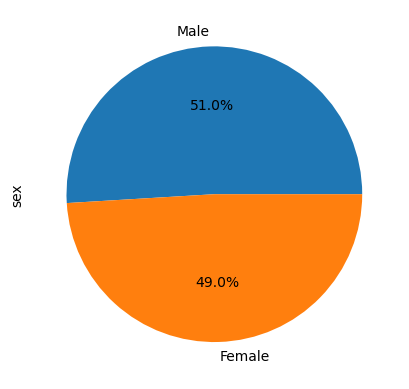

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Generate the data
sex_data = pd.DataFrame(cleaned_df['Sex'].value_counts())
total_mice = sex_data["count"].sum()
percent_male = sex_data.iloc[0,0]/total_mice * 100
percent_female = sex_data.iloc[1,0]/total_mice * 100

percent_list = [percent_male, percent_female]
percent_list

sex_data["Percent"] = percent_list
sex_data

pie_pd = sex_data.plot(kind = "pie", y = "Percent", autopct='%1.1f%%', legend = False)
pie_pd.set_ylabel("sex")
plt.show()

#sex_count = cleaned_df.groupby(['Sex']).count()["Mouse ID"]
#sex_count = sex_count.reset_index()
#type(sex_count)
#sex_count.plot(kind='pie', x = 'Mouse ID', y = 'Sex', autopct='%1.0f%%')
#cleaned_df.groupby(['Sex']).count().plot(kind='pie', x = Sy = 'Mouse ID', autopct='%1.0f%%') 

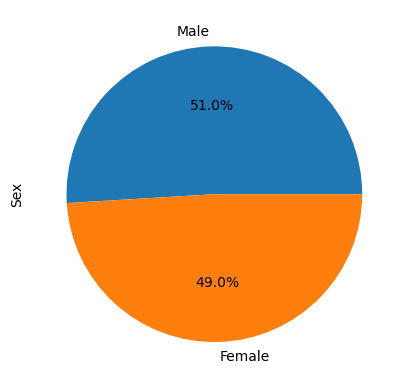

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Use data from above
sex_data
labels = ["Male", "Female"]

#Generate the plot
plt.pie(sex_data["Percent"], labels = labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint